In [9]:
from factor_tools import create_analysis_data
from factor_analysis_tools import USQuantileFactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [10]:
# Analysis parameters
ANALYSIS_PARAMS = {
    'start_date': '2000-01-01',
    'end_date': '2020-12-30',
    'factor_name': 'roe',
    'group_num': 10,
    'rebalance_freq': '1m',
    'ic_periods': 20
}

factor_data_path = 'factor_data'

In [11]:
# Create analysis data
data_df_dic, trading_dates = create_analysis_data(
    ANALYSIS_PARAMS['start_date'],
    ANALYSIS_PARAMS['end_date'],
    ANALYSIS_PARAMS['factor_name'],
    'wrds_data.db',
    factor_data_path
)


Processing dates: 100%|██████████| 5284/5284 [15:09<00:00,  5.81it/s]


In [4]:
trading_dates

[Timestamp('2020-01-17 00:00:00'),
 Timestamp('2020-01-21 00:00:00'),
 Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-01-24 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-01-28 00:00:00'),
 Timestamp('2020-01-29 00:00:00'),
 Timestamp('2020-01-30 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-04 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-02-07 00:00:00'),
 Timestamp('2020-02-10 00:00:00'),
 Timestamp('2020-02-11 00:00:00'),
 Timestamp('2020-02-12 00:00:00'),
 Timestamp('2020-02-13 00:00:00'),
 Timestamp('2020-02-14 00:00:00'),
 Timestamp('2020-02-18 00:00:00'),
 Timestamp('2020-02-19 00:00:00'),
 Timestamp('2020-02-20 00:00:00'),
 Timestamp('2020-02-21 00:00:00'),
 Timestamp('2020-02-24 00:00:00'),
 Timestamp('2020-02-25 00:00:00'),
 Timestamp('2020-02-26 00:00:00'),
 Timestamp('2020-02-27 00:00:00'),
 Timestamp('2020-02-

In [12]:
# Initialize and run analysis
factor_analysis = USQuantileFactorAnalysis(
    data_df_dic=data_df_dic,
    factor_list=[ANALYSIS_PARAMS['factor_name']],
    universe='all',
    group_num=ANALYSIS_PARAMS['group_num'],
    trading_date=trading_dates,
    rebalance_freq=ANALYSIS_PARAMS['rebalance_freq'],
    balance_day= 31,
    ic_periods=ANALYSIS_PARAMS['ic_periods']
)


In [13]:
# Run analysis
factor_analysis.backtest()

Processing dates: 100%|██████████| 5284/5284 [05:07<00:00, 17.19it/s]


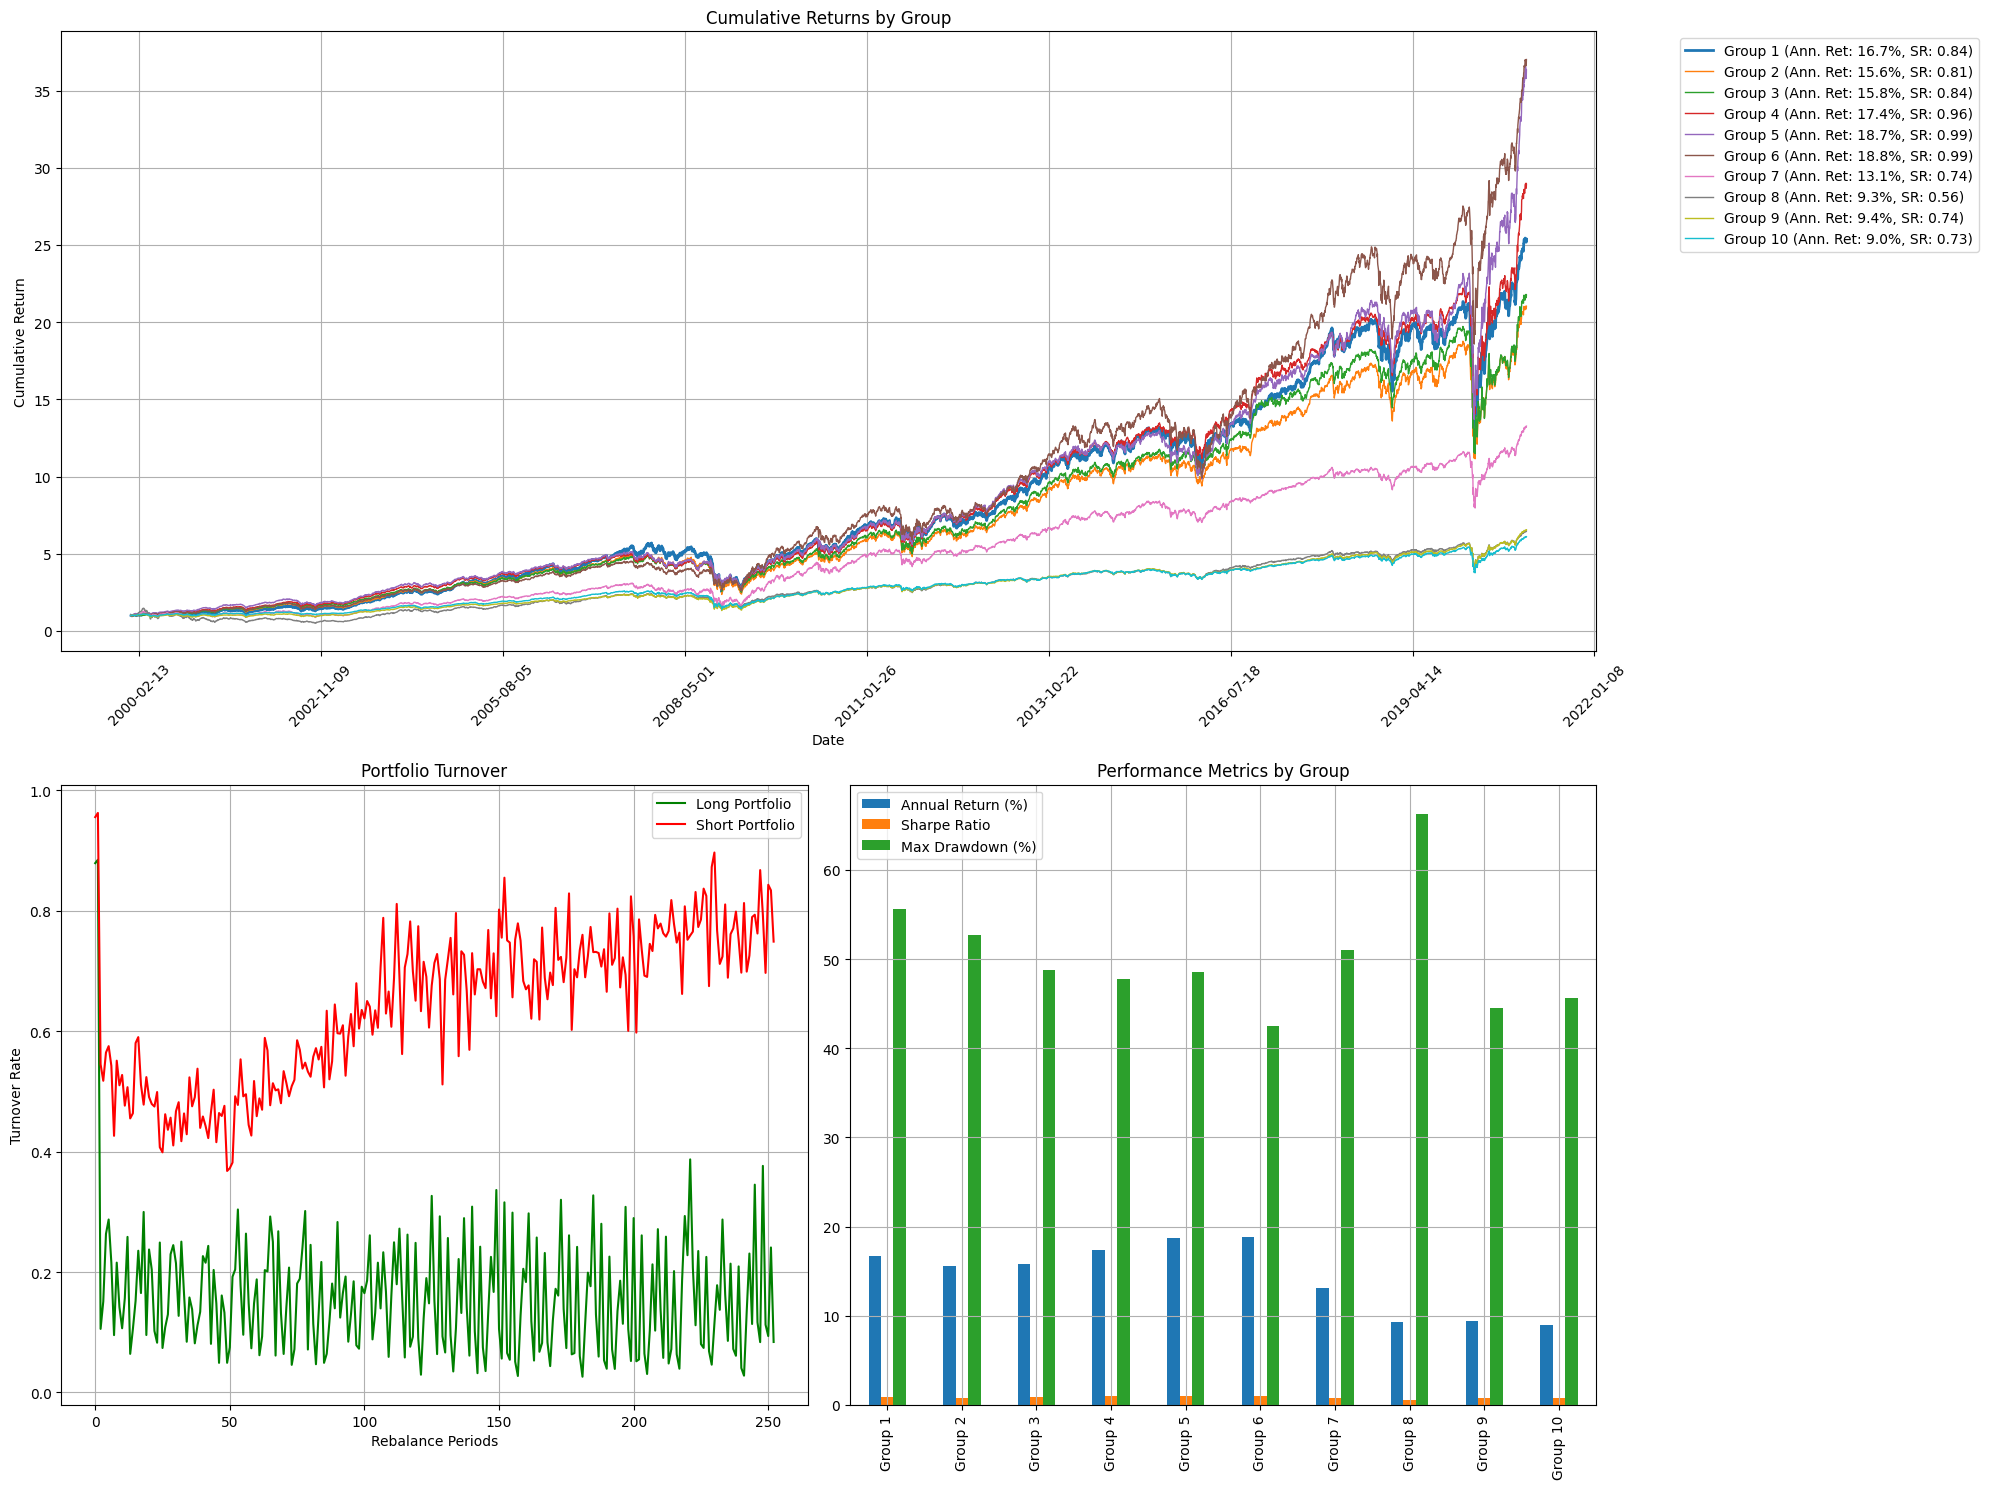

In [14]:
fig = factor_analysis.plot_performance_summary()
plt.show()